In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
from random import sample

In [2]:
# create a Gaussian distribtion of feature - x 
x = np.random.normal(0,1, 100)
# create a Gaussian distribtion of feature - y
y = np.random.normal(0,1, 100)

In [3]:
# add a anomaly point to original distrbution
x = np.append(x, 5)
y = np.append(y, 5)

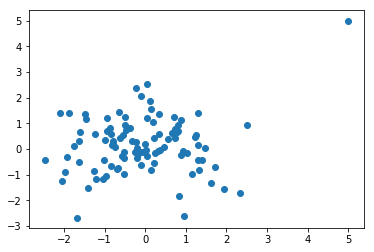

In [4]:
# plot the features
plt.scatter(x,y)

In [5]:
# create a dataframe from feature x and y
df = pd.DataFrame({'x':x, 'y':y})

In [6]:
#initialize the feature ranges for feature x, y
feature_range = {}
for feature in df.columns:
    feature_range[feature] = [df[feature].min(), df[feature].max()]

# list of columns in the dataframe
columns = list(df.columns)

### Inside Point

In [7]:
# get index of a point which belongs to normal profile 
inner_point = df[(df['x'] > -0.2) & (df['x'] < 0.2) &(df['y'] > -0.2) & (df['y'] < 0.2)].index[0]

# assign inner_point to index 
index = inner_point

# initialize a list to store avg_path length w.r.t to increase in # of trees in simulation
avg_trees_path_length_inside = []

for tree in range(1,101):
    
    # initialize the isolation path length that stores the avg path lenght w.r.t number of trees  
    tree_path_length_list_inside = []
    
    for iterations in range(0,tree):
        feature_range_copy = copy.deepcopy(feature_range)
        flag = True
        
        # path length of a tree
        tree_path_length = 0
        
        while flag:

            # 3 Choose a feature randomly.
            selected_feature = sample(list(columns), 1)[0]
            if len(df[selected_feature][(df[selected_feature] > feature_range_copy[selected_feature][0]) & (df[selected_feature] < feature_range_copy[selected_feature][1])]) <= 1:
                flag = False
                break
                
            # Pick a value that’s in the range, again randomly:
            value_picked = df[selected_feature][(df[selected_feature] > feature_range_copy[selected_feature][0]) & (df[selected_feature] < feature_range_copy[selected_feature][1])].sample(1)
            
            # If the chosen value keeps the point above, switch the minimum of the range of the feature to the value
            if df[selected_feature].iloc[index] > value_picked.iloc[0]:
                feature_range_copy[selected_feature][0] = value_picked.iloc[0]
                tree_path_length +=1
            # If the chosen value keeps the point below, switch the maximum of the range of the feature to the value
            else: 
                feature_range_copy[selected_feature][1] = value_picked.iloc[0]
                tree_path_length +=1
        tree_path_length_list_inside.append(tree_path_length)
    avg_trees_path_length_inside.append(np.mean(tree_path_length_list_inside))
        
        
    
#print('Isolation score for observation at index {0} is {1}'.format(index, np.ceil(np.mean(isoloation_score_list_inside))))  

### Outside point

In [8]:
# outside point included manually for simulation purpose 
index = 100

# initialize a list to store avg_path length w.r.t to increase in # of trees in simulation
avg_trees_path_length_outside = []

for tree in range(1,101):
    
    # initialize the isolation path length that stores the avg path lenght w.r.t number of trees  
    tree_path_length_list_outside = []
    
    for iterations in range(0,tree):
        feature_range_copy = copy.deepcopy(feature_range)
        flag = True
        
        # path length of a tree
        tree_path_length = 0
        
        while flag:

            # 3 Choose a feature randomly.
            selected_feature = sample(list(columns), 1)[0]
            if len(df[selected_feature][(df[selected_feature] > feature_range_copy[selected_feature][0]) & (df[selected_feature] < feature_range_copy[selected_feature][1])]) <= 1:
                flag = False
                break
                
            # Pick a value that’s in the range, again randomly:
            value_picked = df[selected_feature][(df[selected_feature] > feature_range_copy[selected_feature][0]) & (df[selected_feature] < feature_range_copy[selected_feature][1])].sample(1)
            
            # If the chosen value keeps the point above, switch the minimum of the range of the feature to the value
            if df[selected_feature].iloc[index] > value_picked.iloc[0]:
                feature_range_copy[selected_feature][0] = value_picked.iloc[0]
                tree_path_length +=1
            # If the chosen value keeps the point below, switch the maximum of the range of the feature to the value
            else: 
                feature_range_copy[selected_feature][1] = value_picked.iloc[0]
                tree_path_length +=1
        tree_path_length_list_outside.append(tree_path_length)
    avg_trees_path_length_outside.append(np.mean(tree_path_length_list_outside))
        
        
    
#print('Isolation score for observation at index {0} is {1}'.format(index, np.ceil(np.mean(isoloation_score_list_inside))))  

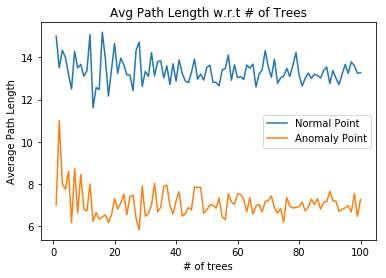

In [17]:
x_axis = np.linspace(1, 100, 100)
plt.plot(x_axis, avg_trees_path_length_inside)
plt.plot(x_axis, avg_trees_path_length_outside)
plt.xlabel('# of trees')
plt.ylabel('Average Path Length')
plt.title('Avg Path Length w.r.t # of Trees')
plt.legend(labels = ['Normal Point', 'Anomaly Point'])